In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.shape

(381109, 12)

In [17]:
# Do customers who that have a vehicle insurance are older in age?
df.groupby(['Previously_Insured']).mean()['Age'].sort_values()

Previously_Insured
1    34.52684
0    42.45564
Name: Age, dtype: float64

In [20]:
# Do customers who that are interested in having a vehicle insurance are older in age?
df.groupby(['Response']).mean()['Age'].sort_values()

Response
0    38.178227
1    43.435560
Name: Age, dtype: float64

In [6]:
# Total nbr of customers that already have a vehicle insurance
df_ins_tot = df[df['Previously_Insured']==1]
# Total nbr of customers that are interested in a vehicle insurance
df_pos_tot = df[df['Response']==1]

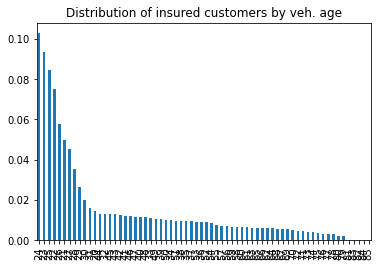

In [9]:
# How are the already insured customers distributed per region?
(df_ins_tot['Age'].value_counts()/df_ins_tot.shape[0]).plot(kind="bar");
plt.title("Distribution of insured customers by veh. age");

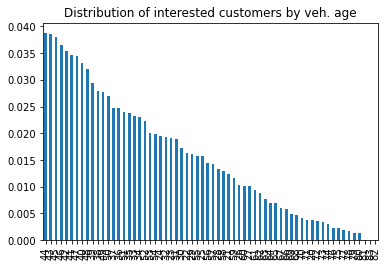

In [10]:
# How are the customers interested in a vehicle insurance distributed per region?
(df_pos_tot['Age'].value_counts()/df_pos_tot.shape[0]).plot(kind="bar");
plt.title("Distribution of interested customers by veh. age");

In [11]:
# Function to see how often each of these individual values appears

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - The pands dataframe you want to search
    col1 - The column name you want to look through
    col2 - The column you want to count values from
    look_for - a list of strings you want to look for in each row of df[col1]
    
    OUTPUT: 
    df_new - a dataframe of each look_for with the count of how often it shows up
    '''
    
    from collections import defaultdict
    
    new_df = defaultdict(int)
    
    for val in look_for: 
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [12]:
df_ins_tot['Age'].value_counts()

24    17970
23    16288
25    14768
22    13111
26    10079
      ...  
81       28
83       14
82       14
84        9
85        4
Name: Age, Length: 66, dtype: int64